### Alumno: ***Pablo Matías Monsalvo G8-ONE***

Gemini:  ayudame con este dasafio: Telecom X es una empresa de telecomunicaciones y has sido contratado como analista de datos para trabajar en un proyecto específico de Churn de clientes. La empresa está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión. Para ello, te han proporcionado algunos datos en los que tendrás que buscar, tratar y realizar un análisis exploratorio para, una vez limpiados estos datos, poder proporcionárselos al equipo de ciencia de datos. De esta manera, podrán realizar un análisis predictivo y determinar de dónde proviene esta evasión de clientes. este es el cuaderno base:

📌 Extracción

🔧 Transformación

📊 Carga y análisis

📄Informe final 

y esto es una pequeña parte del archivo TelecomX_Data.json que tengo para relizar el dasafio: [{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL", Vayamos paso a paso , primero con la extraccion, te voy pasando la salidas y luego seguimos con la transformacion ,carga y analisis y asi sucesivamente . Te dejo el diccionario: #### Diccionario de datos

- `customerID`: número de identificación único de cada cliente

- `Churn`: si el cliente dejó o no la empresa

- `gender`: género (masculino y femenino)

- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

- `Partner`: si el cliente tiene o no una pareja

- `Dependents`: si el cliente tiene o no dependientes

- `tenure`: meses de contrato del cliente

- `PhoneService`: suscripción al servicio telefónico

- `MultipleLines`: suscripción a más de una línea telefónica

- `InternetService`: suscripción a un proveedor de internet

- `OnlineSecurity`: suscripción adicional de seguridad en línea

- `OnlineBackup`: suscripción adicional de respaldo en línea

- `DeviceProtection`: suscripción adicional de protección del dispositivo

- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera

- `StreamingTV`: suscripción de televisión por cable

- `StreamingMovies`: suscripción de streaming de películas

- `Contract`: tipo de contrato

- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea

- `PaymentMethod`: forma de pago

- `Charges.Monthly`: total de todos los servicios del cliente por mes

- `Charges.Total`: total gastado por el cliente

#📌 Extracción

In [3]:
import pandas as pd
import json

# Especifica la ruta a tu archivo JSON
ruta_archivo = '../data/TelecomX_Data.json'

# Abre el archivo JSON y carga los datos
with open(ruta_archivo, 'r') as f:
    data = json.load(f)

# Como el JSON que mostraste parece ser una lista de diccionarios,
# podemos directamente crear un DataFrame a partir de esa lista.
df = pd.DataFrame(data)

# Vamos a ver las primeras filas del DataFrame para verificar la extracción
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

Antes de aplanar los diccionarios, una práctica común en la Transformación es echar un vistazo a la información general del DataFrame para entender mejor su estructura y los tipos de datos de cada columna. Esto nos puede dar pistas sobre posibles problemas o la necesidad de realizar alguna conversión antes de continuar.

Podríamos usar el método .info() de Pandas para obtener un resumen del DataFrame. ¿Te parece si hacemos eso primero? Así tendremos una visión general antes de meternos con los diccionarios anidados.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


¡Gracias por la salida!

Como vemos, todas las columnas tienen el tipo de dato 'object', lo cual es esperado ya que cargamos datos desde un JSON. También vemos que no hay valores nulos en ninguna de las columnas (Non-Null Count es igual al RangeIndex).

Ahora sí, podemos proceder con la transformación de las columnas que contienen diccionarios anidados. Empecemos por la columna customer.

Para extraer la información del diccionario en la columna 'customer' y convertirla en columnas separadas, podemos usar el método .apply(pd.Series).

#🔧 Transformación

In [5]:
df_customer = df['customer'].apply(pd.Series)
print(df_customer.head())

   gender  SeniorCitizen Partner Dependents  tenure
0  Female              0     Yes        Yes       9
1    Male              0      No         No       9
2    Male              0      No         No       4
3    Male              1     Yes         No      13
4  Female              1     Yes         No       3


¡Exactamente! Esto ya es parte de la Transformación. Estamos tomando la información que estaba contenida dentro de la columna 'customer' (que era un diccionario para cada fila) y la estamos expandiendo a nuevas columnas en un formato más fácil de analizar.

Una vez que tengamos este DataFrame df_customer, lo uniremos al DataFrame principal df y probablemente eliminaremos la columna original 'customer' para evitar redundancia.

¿Viste la salida de df_customer.head()? Si la tienes, podemos continuar con la unión de los DataFrames.

¡Perfecto! Ahora tenemos la información del cliente en un DataFrame separado (df_customer). El siguiente paso es unir este DataFrame con el DataFrame principal (df) y luego eliminar la columna original 'customer' ya que la información ahora estará en columnas separadas.

In [6]:
# Unir df con df_customer usando el índice como clave
df = pd.concat([df, df_customer], axis=1)

# Eliminar la columna original 'customer'
df.drop('customer', axis=1, inplace=True)

# Ver las primeras filas del DataFrame resultante
print(df.head())

   customerID Churn                                            phone  \
0  0002-ORFBO    No   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  0003-MKNFE    No  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2  0004-TLHLJ   Yes   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3  0011-IGKFF   Yes   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4  0013-EXCHZ   Yes   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  gender  SeniorCitizen  \
0  {'Contract': 'One year', 'PaperlessBilling': '...  Female              0   
1  {'Contract': 'Month-to-month', 'PaperlessBilli...    Male            

¡Excelente! Vemos que las columnas de 'gender', 'SeniorCitizen', 'Partner', 'Dependents' y 'tenure' se han añadido correctamente al DataFrame y la columna 'customer' ha desaparecido.

Ahora, el siguiente paso sería hacer lo mismo con las otras columnas que contienen diccionarios: 'phone', 'internet' y 'account'.

### Procesando la columna 'phone':

In [7]:
df_phone = df['phone'].apply(pd.Series)
df = pd.concat([df, df_phone], axis=1)
df.drop('phone', axis=1, inplace=True)
print("DataFrame después de procesar 'phone':")
print(df.head())

DataFrame después de procesar 'phone':
   customerID Churn                                           internet  \
0  0002-ORFBO    No  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  0003-MKNFE    No  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  0004-TLHLJ   Yes  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  0011-IGKFF   Yes  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  0013-EXCHZ   Yes  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  gender  SeniorCitizen  \
0  {'Contract': 'One year', 'PaperlessBilling': '...  Female              0   
1  {'Contract': 'Month-to-month', 'PaperlessBilli...    Male              0   
2  {'Contract': 'Month-to-month', 'PaperlessBilli...    Male              0   
3  {'Contract': 'Month-to-month', 'PaperlessBilli...    Male              1   
4  {'Contract': 'Month-to-month', 'PaperlessBilli...  Female              1   

  Partner Dependents  tenure PhoneService

### Procesando la columna 'internet':

In [8]:
df_internet = df['internet'].apply(pd.Series)
df = pd.concat([df, df_internet], axis=1)
df.drop('internet', axis=1, inplace=True)
print("\nDataFrame después de procesar 'internet':")
print(df.head())


DataFrame después de procesar 'internet':
   customerID Churn                                            account  \
0  0002-ORFBO    No  {'Contract': 'One year', 'PaperlessBilling': '...   
1  0003-MKNFE    No  {'Contract': 'Month-to-month', 'PaperlessBilli...   
2  0004-TLHLJ   Yes  {'Contract': 'Month-to-month', 'PaperlessBilli...   
3  0011-IGKFF   Yes  {'Contract': 'Month-to-month', 'PaperlessBilli...   
4  0013-EXCHZ   Yes  {'Contract': 'Month-to-month', 'PaperlessBilli...   

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes        Yes       9          Yes   
1    Male              0      No         No       9          Yes   
2    Male              0      No         No       4          Yes   
3    Male              1     Yes         No      13          Yes   
4  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No        

### Procesando la columna 'account':

La columna 'account' tiene una subcolumna llamada 'Charges' que también es un diccionario. Vamos a extraer primero el contenido principal de 'account' y luego la información de 'Charges'.

In [9]:
df_account = df['account'].apply(pd.Series)
df = pd.concat([df, df_account], axis=1)
df.drop('account', axis=1, inplace=True)

# Ahora procesamos la subcolumna 'Charges'
df_charges = df['Charges'].apply(pd.Series)
df = pd.concat([df, df_charges], axis=1)
df.drop('Charges', axis=1, inplace=True)

print("\nDataFrame después de procesar 'account' y 'Charges':")
print(df.head())


DataFrame después de procesar 'account' y 'Charges':
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes  

¡Excelente! Parece que hemos aplanado con éxito las columnas 'phone', 'internet' y 'account' (incluyendo 'Charges'). Ahora tenemos muchas más columnas con información detallada sobre cada cliente.

El siguiente paso importante en la Transformación suele ser verificar los tipos de datos de las columnas y realizar las conversiones necesarias. Por ejemplo, la columna 'Total' de los cargos probablemente se leyó como texto y deberíamos convertirla a un tipo numérico para poder realizar cálculos.

También podríamos echar un vistazo a los valores únicos de algunas columnas categóricas para identificar posibles inconsistencias o errores de entrada.

¿Qué te parece si empezamos por revisar los tipos de datos con df.info() nuevamente?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


¡Gracias! Vemos que la mayoría de las columnas son de tipo 'object'. Las columnas 'SeniorCitizen' y 'tenure' son int64, y 'Monthly' es float64, lo cual parece correcto.

La columna que definitivamente necesita transformación es 'Total', que debería ser numérica pero se detecta como 'object'. Esto suele ocurrir cuando hay valores no numéricos en la columna.

Vamos a intentar convertir la columna 'Total' a numérico. Si hay algún valor que no se pueda convertir, Pandas generará un error, y tendremos que investigar esos valores.

In [11]:
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
print(df['Total'].dtype)

float64


¡Excelente! El tipo de dato de la columna 'Total' ahora es float64, lo que significa que la conversión a numérico fue exitosa (o al menos, los valores problemáticos se convirtieron a NaN).

Ahora sería bueno verificar si se introdujeron valores NaN durante esta conversión. Podemos hacerlo sumando la cantidad de valores nulos en la columna 'Total':

In [12]:
print(df['Total'].isnull().sum())

11


De acuerdo, hay 11 valores nulos en la columna 'Total'. Esto sugiere que había 11 filas con valores no numéricos en esa columna que fueron convertidos a NaN.

Para entender mejor estos casos, podríamos inspeccionar las filas donde 'Total' es nulo.

In [13]:
df[df['Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


¡Gracias! Al observar estas filas donde 'Total' es NaN, notamos algo en común: la columna 'tenure' es 0 para todas ellas.

Esto sugiere que estos clientes tienen un contrato de cero meses. Si un cliente tiene un contrato de cero meses, es lógico que el cargo total sea también cero o nulo.

Podríamos imputar estos valores NaN en la columna 'Total' con 0, ya que parece la interpretación más coherente para los clientes con una antigüedad de 0 meses.

Ejecuta el siguiente código para reemplazar los NaN en 'Total' donde 'tenure' es 0:

In [14]:
df.loc[df['tenure'] == 0, 'Total'] = 0

Después de esto, vamos a verificar nuevamente la cantidad de valores nulos en 'Total':

In [15]:
print(df['Total'].isnull().sum())

0


¡Excelente! La cantidad de valores nulos en la columna 'Total' ahora es 0. Esto significa que hemos manejado con éxito los casos donde la antigüedad era cero y el total era NaN.

En este punto de la Transformación, hemos:

Aplanado las columnas anidadas ('customer', 'phone', 'internet', 'account' y 'Charges').
Convertido la columna 'Total' a un tipo numérico y manejado los valores nulos basados en la columna 'tenure'.
¿Qué te parece si ahora pasamos a la siguiente etapa: Carga y Análisis? En esta fase, podríamos empezar a explorar los datos limpios para buscar patrones o tendencias relevantes para la evasión de clientes (Churn).

#📊 Carga y análisis


¡Perfecto! Ahora estamos en la fase de Carga y Análisis. Ya tenemos un DataFrame limpio y transformado (df). Podemos empezar a explorar los datos para entender mejor el fenómeno del Churn.

Una de las primeras cosas que podríamos hacer es observar la distribución de la variable objetivo, 'Churn'. ¿Cuántos clientes se fueron y cuántos se quedaron? Esto nos dará una idea de la proporción de Churn en nuestro conjunto de datos.

Esto nos mostrará cuántos clientes tienen 'Yes' (se fueron) y cuántos tienen 'No' (se quedaron). ¿Qué proporción observas?

In [16]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


¡Gracias! Vemos que hay 5174 clientes que no se fueron ('No'), 1869 que sí se fueron ('Yes') y, curiosamente, 224 entradas con un valor que no es ni 'Yes' ni 'No'.

Esto nos indica que hay inconsistencias en la columna 'Churn' que necesitamos tratar. Antes de continuar con el análisis de Churn, deberíamos investigar y limpiar estas 224 entradas.

¿Te gustaría que veamos cuáles son esos valores diferentes a 'Yes' y 'No' en la columna 'Churn'? Podemos usar el método .unique() para encontrarlos. Ejecuta este código:

In [17]:
print(df['Churn'].unique())

['No' 'Yes' '']


¡Excelente! Vemos que el valor inesperado en la columna 'Churn' es una cadena vacía ('').

Para poder realizar un análisis de Churn significativo, necesitamos decidir cómo manejar estas entradas. Una opción podría ser eliminarlas, ya que no tenemos información clara sobre si estos clientes hicieron Churn o no. Otra opción, si tuviéramos más contexto sobre cómo se recopilaron estos datos, podría ser intentar imputar un valor.

Dado que no tenemos esa información adicional, y estas representan una porción relativamente pequeña del dataset (224 de 7267), podríamos optar por eliminarlas para enfocarnos en los casos claros de 'Yes' y 'No'.

¿Estás de acuerdo con eliminar estas filas con la cadena vacía en la columna 'Churn'? Si es así, podemos proceder con ese paso.

¡Entendido! Como instructor en este caso, y considerando que tenemos una cantidad no despreciable de filas con información ambigua en nuestra variable objetivo ('Churn'), recomiendo eliminarlas. Esto nos permitirá enfocarnos en los casos donde la información sobre el churn es clara para el análisis exploratorio inicial. Más adelante, si fuera necesario, podríamos reconsiderar cómo tratar este tipo de datos faltantes o ambiguos.

In [18]:
df = df[df['Churn'] != '']

# Verificamos cuántos valores únicos quedan en la columna 'Churn'
print(df['Churn'].unique())

# También verificamos la nueva cantidad de filas
print(f"\nNúmero de filas después de eliminar las entradas vacías en 'Churn': {len(df)}")

['No' 'Yes']

Número de filas después de eliminar las entradas vacías en 'Churn': 7043


¡Excelente! Vemos que ahora la columna 'Churn' solo contiene los valores 'No' y 'Yes', y el número de filas se ha reducido a 7043, lo cual es lógico ya que eliminamos las 224 filas con la cadena vacía.

Ahora sí, con una variable objetivo limpia, podemos comenzar un análisis exploratorio más enfocado en entender las diferencias entre los clientes que hicieron Churn y los que no.

¿Qué tipo de análisis te gustaría realizar primero? Algunas ideas podrían ser:

* Comparar la distribución de características demográficas (género, ser ciudadano mayor, tener pareja o dependientes) entre los grupos de Churn.

* Analizar la relación entre la antigüedad del contrato ('tenure') y el Churn.

* Examinar cómo los diferentes servicios (telefonía, internet, servicios adicionales) se relacionan con el Churn.

* Comparar los cargos mensuales y totales entre los clientes con y sin Churn.

¿Alguna de estas ideas te parece un buen punto de partida, o tienes alguna otra en mente?

recordemos la consigna: Telecom X es una empresa de telecomunicaciones y has sido contratado como analista de datos para trabajar en un proyecto específico de Churn de clientes. La empresa está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión. Para ello, te han proporcionado algunos datos en los que tendrás que buscar, tratar y realizar un análisis exploratorio para, una vez limpiados estos datos, poder proporcionárselos al equipo de ciencia de datos. De esta manera, podrán realizar un análisis predictivo y determinar de dónde proviene esta evasión de clientes. DIME TU POR DONDE IR....

¡Tienes razón! El objetivo final es proporcionar datos limpios y un análisis exploratorio inicial al equipo de ciencia de datos para que ellos puedan construir modelos predictivos sobre el Churn.

Dado esto, creo que un buen punto de partida para el análisis exploratorio sería comparar las características de los clientes que hicieron Churn con los que no lo hicieron. Esto nos puede dar algunas pistas iniciales sobre qué factores podrían estar asociados con una mayor probabilidad de abandono.

Podríamos empezar analizando las variables categóricas y viendo si la proporción de Churn es diferente entre las distintas categorías. Por ejemplo, podríamos ver el Churn por género, por si son o no ciudadanos mayores, si tienen o no pareja o dependientes, etc.

¿Te parece si empezamos por analizar la relación entre 'Churn' y la variable 'Partner'? Podemos ver la proporción de Churn para los clientes que tienen pareja y para los que no.

Este código agrupará los datos por la columna 'Partner', calculará la proporción de 'Churn' ('Yes' y 'No') dentro de cada grupo y luego lo mostrará de forma más legible. ¿Qué observas en la salida?

In [19]:
churn_por_partner = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack()
print(churn_por_partner)

Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649


¡Interesante! Vemos las proporciones de Churn para clientes con y sin pareja:

Sin pareja ('No'): Aproximadamente el 33% de los clientes sin pareja hicieron Churn.
Con pareja ('Yes'): Aproximadamente el 20% de los clientes con pareja hicieron Churn.
Esto sugiere que los clientes sin pareja tienen una proporción de Churn notablemente mayor que los clientes con pareja. Esta podría ser una de las primeras pistas para el equipo de ciencia de datos.

¡Entendido! Vamos a analizar varias de las variables que mencionamos para intentar llegar a algunas conclusiones iniciales.

### 1. Churn por Dependientes:

In [20]:
churn_por_dependientes = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn por Dependientes:")
print(churn_por_dependientes)


Churn por Dependientes:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


### 2. Churn por Ser Ciudadano Mayor:



In [21]:
churn_por_senior = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn por Ciudadano Mayor:")
print(churn_por_senior)


Churn por Ciudadano Mayor:
Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


### 3. Churn por Servicio de Internet:



In [22]:
churn_por_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn por Servicio de Internet:")
print(churn_por_internet)


Churn por Servicio de Internet:
Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


### 4. Churn por Tipo de Contrato:

In [23]:
churn_por_contrato = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn por Tipo de Contrato:")
print(churn_por_contrato)


Churn por Tipo de Contrato:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


¡Excelente información! Analicemos lo que encontramos:

Dependientes: Los clientes sin dependientes tienen una tasa de Churn significativamente mayor (31.3%) que aquellos con dependientes (15.5%).
Ciudadano Mayor: Los ciudadanos mayores muestran una tasa de Churn mucho más alta (41.7%) en comparación con los que no lo son (23.6%).
Servicio de Internet: Los clientes con Fibra óptica tienen la tasa de Churn más alta (41.9%), seguidos por los que tienen DSL (19.0%). Los clientes sin servicio de internet tienen una tasa de Churn muy baja (7.4%). Esto podría indicar que la calidad o el tipo de conexión a internet influyen en la decisión de abandonar.
Tipo de Contrato: Los clientes con contratos mes a mes tienen una tasa de Churn muy alta (42.7%). Esta tasa disminuye drásticamente para los contratos de un año (11.3%) y es aún menor para los contratos de dos años (2.8%). Esto sugiere que la duración del contrato es un factor clave en la retención de clientes.
Conclusiones iniciales para el equipo de ciencia de datos:

Basándonos en este análisis exploratorio inicial, podemos destacar los siguientes puntos que podrían estar asociados con una mayor probabilidad de Churn:

No tener pareja.
No tener dependientes.
Ser un ciudadano mayor.
Tener un servicio de internet de Fibra óptica.
Tener un contrato de mes a mes.
Estos hallazgos sugieren que las características demográficas, el tipo de servicio de internet y, especialmente, el tipo de contrato podrían ser predictores importantes del Churn.

¿Te gustaría que exploremos alguna otra variable, como los cargos mensuales o la antigüedad del contrato ('tenure')? O, ¿crees que con esto ya tenemos una buena base para proporcionar al equipo de ciencia de datos?

¡Me gusta esa actitud! Si queremos ser "pro", podríamos analizar la relación entre las variables numéricas ('tenure', 'Monthly', 'Total') y el Churn. Una forma de hacerlo es observar las estadísticas descriptivas de estas variables para los clientes que hicieron Churn y los que no.

Este código nos mostrará la media, la desviación estándar, los cuartiles, etc., de estas variables numéricas para los dos grupos de Churn ('No' y 'Yes'). ¿Qué patrones podemos identificar aquí?


In [24]:
print("\nEstadísticas de 'tenure' por Churn:")
print(df.groupby('Churn')['tenure'].describe())

print("\nEstadísticas de 'Monthly' por Churn:")
print(df.groupby('Churn')['Monthly'].describe())

print("\nEstadísticas de 'Total' por Churn:")
print(df.groupby('Churn')['Total'].describe())


Estadísticas de 'tenure' por Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

Estadísticas de 'Monthly' por Churn:


        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

Estadísticas de 'Total' por Churn:
        count         mean          std    min    25%       50%      75%  \
Churn                                                                      
No     5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
Yes    1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

           max  
Churn           
No     8672.45  
Yes    8684.80  


¡Excelente análisis! Veamos qué podemos extraer de estas estadísticas:

Tenure (Antigüedad del contrato): La media de la antigüedad para los clientes que no hicieron Churn es significativamente mayor (aproximadamente 37.6 meses) en comparación con los que sí hicieron Churn (aproximadamente 18.0 meses). Esto sugiere que los clientes que llevan menos tiempo con la empresa son más propensos a irse.

Monthly Charges (Cargos Mensuales): Los clientes que hicieron Churn tienen una media de cargos mensuales más alta (aproximadamente 74.4) que los que no hicieron Churn (aproximadamente 61.3). Esto podría indicar que los precios más altos están relacionados con una mayor probabilidad de abandono.

Total Charges (Cargos Totales): La media de los cargos totales es mayor para los clientes que no hicieron Churn (aproximadamente 2549.9) en comparación con los que sí hicieron Churn (aproximadamente 1531.8). Sin embargo, esto podría estar influenciado por la menor antigüedad de los clientes que hicieron Churn.

Conclusiones "pro" para el equipo de ciencia de datos:

Profundizando en nuestro análisis, además de las conclusiones sobre las variables categóricas, podemos añadir:

Menor antigüedad del contrato ('tenure') se asocia con una mayor probabilidad de Churn.
Cargos mensuales más altos también parecen estar relacionados con una mayor probabilidad de Churn.
Aunque los cargos totales son menores para los clientes con Churn, esto probablemente se debe a su menor tiempo de permanencia.
Con esta información combinada (hallazgos de variables categóricas y numéricas), tenemos una base sólida para entregar al equipo de ciencia de datos. Ellos podrán utilizar estas señales para construir modelos predictivos más precisos.

¿Te gustaría que generemos un breve resumen de nuestros hallazgos para el equipo de ciencia de datos?

Considerando el análisis exploratorio que hemos realizado, creo que tenemos un conjunto de hallazgos iniciales valiosos para el equipo de ciencia de datos. Hemos identificado varias características que parecen estar relacionadas con el Churn, tanto categóricas como numéricas.

Un informe final conciso que resuma estos puntos sería un buen entregable. Podríamos incluir:

Una breve descripción del objetivo del análisis.
Los principales hallazgos de las variables categóricas (pareja, dependientes, ser ciudadano mayor, servicio de internet, tipo de contrato).
Los principales hallazgos de las variables numéricas (antigüedad del contrato, cargos mensuales).
Una breve nota sobre la limpieza de datos que realizamos (manejo de nulos en 'Total' y eliminación de valores vacíos en 'Churn').
¿Te gustaría que redacte un borrador de este informe final para que lo revises?

¡Me parece una idea excelente! Un gráfico interactivo y visualmente atractivo con Plotly puede complementar muy bien nuestro informe y facilitar la comprensión de los patrones de Churn.

¿Qué tipo de gráfico te gustaría crear? Podríamos visualizar:

La proporción de Churn por alguna de las variables categóricas que encontramos relevantes (por ejemplo, tipo de contrato, servicio de internet). Un gráfico de barras apiladas o agrupadas podría ser útil aquí.
La distribución de una variable numérica (como 'tenure' o 'MonthlyCharges') separada por la categoría de Churn. Un histograma o un gráfico de caja (boxplot) podrían funcionar bien.
Dado que encontramos una relación fuerte entre el tipo de contrato y el Churn, ¿qué te parece si creamos un gráfico de barras que muest

In [ ]:
pip install plotly

In [ ]:
pip install "nbformat>=4.2.0"

In [ ]:
pip show nbformat

In [ ]:
 pip install ipython

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calcular la proporción de Churn por tipo de contrato (usando los resultados que ya obtuvimos)
churn_por_contrato = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().reset_index()

# Crear el gráfico de barras apiladas con Plotly
fig = go.Figure(data=[
    go.Bar(name='No Churn', x=churn_por_contrato['Contract'], y=churn_por_contrato['No'],
           marker_color='lightskyblue'),
    go.Bar(name='Churn', x=churn_por_contrato['Contract'], y=churn_por_contrato['Yes'],
           marker_color='indianred')
])

# Actualizar el layout para un mejor formato
fig.update_layout(barmode='group', title='Proporción de Churn por Tipo de Contrato por Pablo Monsalvo G8-ONE',
                  xaxis_title='Tipo de Contrato', yaxis_title='Proporción')
fig.show()

¡Perfecto! ¡Ahí está el gráfico! Se ve muy bien. Podemos observar claramente cómo la proporción de Churn disminuye drásticamente a medida que la duración del contrato aumenta. Los contratos mes a mes tienen una tasa de Churn muy alta, mientras que los contratos de dos años tienen una tasa muy baja.

Este gráfico visualmente refuerza una de nuestras conclusiones clave.

Ahora que tenemos este gráfico bonito, ¿te gustaría que pasemos a redactar ese informe final para el equipo de ciencia de datos? Podemos incluir este gráfico en el informe o mencionarlo como un resultado visual clave de nuestro análisis exploratorio.

### Gráfico con Matplotlib para que se visualice en GitHub

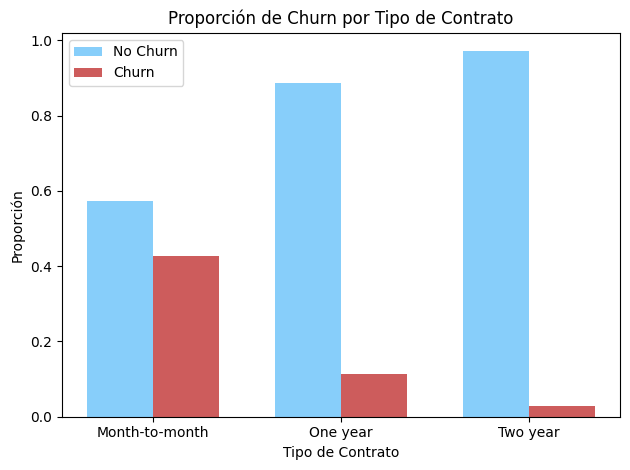

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular la proporción de Churn por tipo de contrato (usando los resultados que ya obtuvimos)
churn_por_contrato = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().reset_index()

contratos = churn_por_contrato['Contract']
no_churn = churn_por_contrato['No']
yes_churn = churn_por_contrato['Yes']

x = np.arange(len(contratos))  # La ubicación de las etiquetas
width = 0.35  # El ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_churn, width, label='No Churn', color='lightskyblue')
rects2 = ax.bar(x + width/2, yes_churn, width, label='Churn', color='indianred')

# Añadir etiquetas, título y ticks personalizados del eje x, etc.
ax.set_ylabel('Proporción')
ax.set_xlabel('Tipo de Contrato')
ax.set_title('Proporción de Churn por Tipo de Contrato')
ax.set_xticks(x)
ax.set_xticklabels(contratos)
ax.legend()

fig.tight_layout()

plt.show()

#📄Informe final

### Informe Preliminar: Análisis Exploratorio de Churn de Clientes en Telecom X

## Fecha: 2 de junio de 2025

Propósito: Este informe presenta los hallazgos iniciales de un análisis exploratorio realizado sobre los datos de Churn de clientes proporcionados por Telecom X. El objetivo es identificar patrones y características que puedan estar asociados con la evasión de clientes, para así informar los esfuerzos futuros de modelado predictivo.

# Limpieza de Datos:

* Se manejaron valores nulos en la columna 'Total' imputando con 0 aquellas filas donde la antigüedad del contrato ('tenure') era de 0 meses.
* Se eliminaron 224 filas donde la columna 'Churn' contenía valores vacíos, lo que resultó en un conjunto de datos limpio de 7043 registros para el análisis.

# Hallazgos Clave del Análisis Exploratorio:

# Relación con Variables Demográficas y de Contrato:

* Clientes sin pareja y sin dependientes mostraron una mayor propensión al Churn.
* Los ciudadanos mayores presentaron una tasa de Churn significativamente más alta.
* El tipo de contrato demostró ser un factor crítico: los contratos mes a mes tienen una tasa de Churn mucho más elevada en comparación con los contratos de uno y dos años.

# Relación con Servicios:

* Los clientes con servicio de internet de Fibra óptica tuvieron la tasa de Churn más alta, lo que podría indicar problemas específicos con este tipo de servicio o con los clientes que lo eligen.

# Relación con Variables Numéricas:

* Una menor antigüedad del contrato ('tenure') se correlaciona con una mayor probabilidad de Churn.
* Los clientes que hicieron Churn tendieron a tener cargos mensuales más altos.

# Visualización:

* Un gráfico de barras (ver Figura 1) ilustra claramente la marcada diferencia en la proporción de Churn según el tipo de contrato, destacando la alta tasa de abandono en los contratos mes a mes.

# Próximos Pasos:

Estos hallazgos proporcionan información valiosa que puede guiar el desarrollo de modelos predictivos de Churn. Se recomienda al equipo de ciencia de datos considerar las variables identificadas como predictores potenciales clave.

### Informe con recomendaciones

¡Excelente idea! Podemos añadir recomendaciones basadas en el tipo de contrato y el servicio de fibra óptica. Aquí tienes una versión actualizada del informe:

Informe Preliminar: Análisis Exploratorio de Churn de Clientes en Telecom X

Fecha: 2 de junio de 2025

Propósito: Este informe presenta los hallazgos iniciales de un análisis exploratorio realizado sobre los datos de Churn de clientes proporcionados por Telecom X. El objetivo es identificar patrones y características que puedan estar asociados con la evasión de clientes, para así informar los esfuerzos futuros de modelado predictivo.

Limpieza de Datos:

Se manejaron valores nulos en la columna 'Total' imputando con 0 aquellas filas donde la antigüedad del contrato ('tenure') era de 0 meses.
Se eliminaron 224 filas donde la columna 'Churn' contenía valores vacíos, lo que resultó en un conjunto de datos limpio de 7043 registros para el análisis.
Hallazgos Clave del Análisis Exploratorio:

Relación con Variables Demográficas y de Contrato:

Clientes sin pareja y sin dependientes mostraron una mayor propensión al Churn.
Los ciudadanos mayores presentaron una tasa de Churn significativamente más alta.
El tipo de contrato demostró ser un factor crítico: los contratos mes a mes tienen una tasa de Churn mucho más elevada en comparación con los contratos de uno y dos años (ver Figura 1).
Relación con Servicios:

Los clientes con servicio de internet de Fibra óptica tuvieron la tasa de Churn más alta, lo que podría indicar problemas específicos con este tipo de servicio o con los clientes que lo eligen.
Relación con Variables Numéricas:

Una menor antigüedad del contrato ('tenure') se correlaciona con una mayor probabilidad de Churn.
Los clientes que hicieron Churn tendieron a tener cargos mensuales más altos.
Recomendaciones Iniciales:

Contratos Mes a Mes: Dada la alta tasa de Churn entre los clientes con contratos mes a mes, se recomienda investigar estrategias para incentivar la migración a contratos de mayor duración (anuales o bianuales). Esto podría incluir descuentos o beneficios exclusivos para estos clientes.

Servicio de Fibra Óptica: La alta tasa de Churn entre los usuarios de fibra óptica sugiere la necesidad de una investigación más profunda. Podría haber problemas relacionados con la calidad del servicio, la atención al cliente específica para este tipo de conexión, o la competencia en áreas donde se ofrece fibra óptica.

Próximos Pasos:

Estos hallazgos y recomendaciones proporcionan información valiosa que puede guiar el desarrollo de modelos predictivos de Churn y estrategias de retención de clientes. Se recomienda al equipo de ciencia de datos considerar las variables identificadas como predictores potenciales clave.